<a href="https://colab.research.google.com/github/kulkarnisunil/Class_Assingments/blob/main/Boosting_Techniques_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1:  What is Boosting in Machine Learning? Explain how it improves weak learners.

Answer :   

Boosting is an ensemble machine learning technique that combines multiple weak learners—simple models performing slightly better than random guessing—into a single strong learner with high predictive accuracy. It builds models sequentially, where each subsequent weak learner focuses on correcting the errors of the previous ones by assigning higher weights to misclassified training instances.

Boosting starts by training the first weak learner, often a shallow decision tree, on the full dataset. Errors are then calculated, and weights are updated: instances misclassified by this learner get higher weights, while correctly classified ones get lower weights. The next weak learner trains on this reweighted dataset, emphasizing harder examples, and the process repeats for several iterations.

**how it improves weak learners.**

This sequential focus reduces bias and variance iteratively, as each learner contributes to the ensemble with a weight based on its performance—stronger performers influence the final prediction more. The final model aggregates predictions via weighted voting (classification) or averaging (regression), yielding superior accuracy compared to individual weak learners.


## Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

Answer :       

AdaBoost and Gradient Boosting are both sequential boosting algorithms that convert weak learners into strong ones, but they differ in how they train models and handle errors.

**AdaBoost**

AdaBoost (Adaptive Boosting) trains weak learners sequentially by reweighting the training data: after each model, it increases weights on misclassified instances and decreases them on correct ones. The next learner focuses on these hard examples via weighted sampling, using exponential loss to compute model weights based on error rates, then combines via weighted voting.

- AdaBoost adaptively weights data samples to emphasize errors discretely, sensitive to outliers due to exponential loss

- AdaBoost is faster but less robust

**Gradient Boosting**

Gradient Boosting fits each new weak learner (typically a decision tree) to the residuals—or negative gradients—of the loss function from the cumulative ensemble so far. It uses gradient descent to minimize a differentiable loss (e.g., MSE for regression, log-loss for classification), making it more flexible for various tasks beyond binary classification.

-Gradient Boosting regresses on pseudo-residuals continuously via gradients, handling noise better and supporting custom losses—powering XGBoost for superior performance on complex data

- Gradient Boosting scales with tuning like learning rate

## Question 3: How does regularization help in XGBoost?

Answer :                       
Regularization in XGBoost prevents overfitting by adding penalty terms directly to the model's objective function, which balances prediction accuracy against model complexity during tree construction

XGBoost incorporates L1 (alpha) and L2 (lambda) regularization penalties on leaf weights in its loss function, discouraging excessively large weights that lead to complex trees fitting training noise. This integrated approach penalizes complexity at every boosting iteration, unlike traditional methods relying solely on hyperparameters like max_depth.

**Advantages:**

* Overfitting Prevention: Higher regularization shrinks weights toward zero, promoting simpler trees that generalize better to unseen data.

* Improved Generalization: It enhances performance on validation sets by reducing variance without excessive bias.

* Feature Selection: L1 regularization sparsifies models by zeroing out irrelevant features.


**reg_alpha and reg_lambda Effects**

reg_alpha (L1/Lasso) makes some feature weights zero, picking key features and ignoring weak ones. reg_lambda (L2/Ridge) shrinks all weights evenly, making the model steady without dropping features

**Gamma vs max_depth**

Gamma : minimum loss reduction for splits

Gamma stops splits unless they cut loss by a set amount, pruning weak branches post-build.

max_depth : max_depth caps tree height upfront, blocking deep growth—gamma is finer control on split quality

**Early Stopping**

Early stopping in XGBoost watches validation score during training and halts if it stalls for set rounds, like 10, avoiding overfit. It picks the best model round automatically

- halts training when validation performance plateaus

**min_child_weight Impact**

- minimum leaf weight sum

min_child_weight sets minimum total weight (like samples) per leaf; higher values make bigger leaves, simpler trees, and less overfitting on noise.


## Question 4: Why is CatBoost considered efficient for handling categorical data?

Answer :   

CatBoost are order boosting

CatBoost efficiently handles categorical data by using ordered target encoding and symmetric trees, eliminating manual encoding while preventing target leakage.

Target guided encoding based on target column take the mean.

Formula :  Current_Count + Prior_value / max_count + 1

In Regression : make bin

**benifits :**   

- Native categorical feature handling:

      Turns categories (like red/blue) into numbers inside—no one-hot explosion.

- Ordered Encoding:
    
      Averages targets per category using only past data; stops leakage and overfitting.

- Efficient with High-Cardinality:

        Manages 1000s of unique values (e.g., cities) without bloating memory/time

- Symmetric (oblivious) trees

      Uses the same split condition at each tree level.

      Faster training, easier optimization, and better generalization.

- Minimal preprocessing

      Works well with raw datasets containing mixed numerical and categorical features.

      Less feature engineering required.

## Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

Answer :                

Boosting is preferred over bagging when high accuracy is needed and the model must focus on correcting previous mistakes in complex datasets.

**real-world applications :**

1. Customer Churn Prediction

Telecom and banking use boosting to predict user drop-off, as it captures subtle patterns in customer behavior data better than bagging's variance reduction.

2. Fraud Detection

Financial firms prefer boosting for real-time transaction scoring; its bias reduction spots rare fraud signals missed by bagging's parallel averaging.

3. Ad Click Prediction

Tech giants like Google apply XGBoost for click-through rates, leveraging sequential learning on large feature sets for precise rankings.

4. Medical Diagnosis

Boosting aids in disease prediction from tabular health data, handling bias in simple trees more effectively than bagging on clean datasets

5. Search ranking systems

improves ranking by correcting previous errors

### Datasets: Use sklearn.datasets.load_breast_cancer() for classification tasks.  

### Use sklearn.datasets.fetch_california_housing() for regression tasks.


## Question 6: Write a Python program to: Train an AdaBoost Classifier on the Breast Cancer dataset and Print the model accuracy

Answer :  

In [92]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [93]:
import warnings

warnings.filterwarnings('ignore')

In [94]:
data=load_breast_cancer()

In [95]:
import pandas as pd
pd.set_option('display.max_columns',None)

df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [96]:
df.shape

(569, 31)

In [97]:
X=data.data
y=data.target

In [98]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.28,random_state=42)

In [100]:
# Train AdaBoost Classifier

adaboost_classifier = AdaBoostClassifier(n_estimators=75,learning_rate=0.1,algorithm="SAMME",random_state=42)

In [101]:
adaboost_classifier.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=75,
                   random_state=42)

In [102]:
 #Prediction and accuracy

pred=adaboost_classifier.predict(X_test)

In [103]:
print(f"adaboost classfier accuracy : {accuracy_score(y_test,pred)} ")

adaboost classfier accuracy : 0.95625 


## Question 7:  Write a Python program to: Train a Gradient Boosting Regressor on the California Housing dataset and Evaluate performance using R-squared score

Answer :   

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [ ]:
data = fetch_california_housing()

In [ ]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print(df.shape)

(20640, 9)


In [ ]:
X=data.data
y=data.target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
# Train Gradient Boosting Regressor

Gradient_boost_regressor=GradientBoostingRegressor(
    n_estimators=110,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.7,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt'
)

In [ ]:
Gradient_boost_regressor.fit(X_train,y_train)

GradientBoostingRegressor(max_features='sqrt', n_estimators=110, subsample=0.7)

In [ ]:
# prediction
regressor_prediction=Gradient_boost_regressor.predict(X_test)

In [ ]:
#  R-squared score
R_square=r2_score(y_test,regressor_prediction)

print(f"R-squared score : {R_square}")

R-squared score : 0.7663855609071142


In [ ]:
n = len(y_test)
p = X.shape[1]
adjusted_r2 = 1 - ((1 - R_square) * (n - 1)) / (n - p - 1)
print(adjusted_r2)

0.7659318305082934


## Question 8: Write a Python program to: Train an XGBoost Classifier on the Breast Cancer dataset ,Tune the learning rate using GridSearchCV and Print the best parameters and accuracy

Answer :

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset=load_breast_cancer()

In [ ]:
X=dataset.data
y=dataset.target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

In [ ]:
#hyperparameter

param_grid={
    'learning_rate':[0.01,0.1,0.2],
    'n_estimators':[80,100,170],
    'max_depth':[3,5,7],
    'subsample':[0.7,0.8,1.0], # Adds randomness, reduces overfitting
    #'colsample_bytree':[0.6,0.8,1] ,#preventing any single feature from dominating all trees.
    # Regularization parameter
    #'reg_alpha':[0,0.1,0.5],
    #'reg_lambda': [1, 1.5, 2],
    #"gamma":[0,0.1,0.5]
    #"early_stopping_rounds":[20,50,60]

}

In [ ]:
grid_search=GridSearchCV(estimator=xgb_model,param_grid=param_grid,cv=5,scoring='accuracy',verbose=1)

In [ ]:
grid_search

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [80, 100, 170],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [80, 100, 170],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 170, 'subsample': 0.7}

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=170, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 170, 'subsample': 0.7}


In [ ]:
print(f"XGBoost Accuracy: {accuracy:.2f}")

XGBoost Accuracy: 0.97


## Question 9: Write a Python program to: Train a CatBoost Classifier , Plot the confusion matrix using seaborn

Answer :  

In [ ]:
#!pip install catboost

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import catboost as cb
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=42)

In [ ]:
# Train CatBoost Classifier
CatBoost_classifier = cb.CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    # l2_leaf_reg : control overfitting
    cat_features=None,#categorical columns automatically handled by CatBoost.
    random_seed=42,
    verbose=False
)

In [ ]:
CatBoost_classifier.fit(X_train,y_train)

In [ ]:
#prediction

y_pred=CatBoost_classifier.predict(X_test)

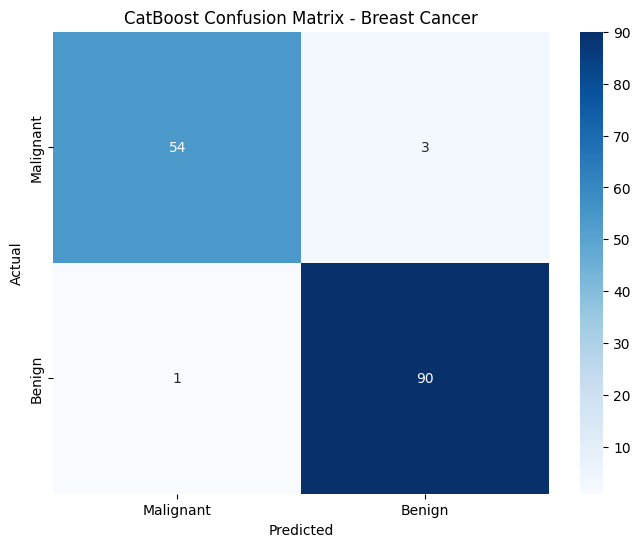

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title('CatBoost Confusion Matrix - Breast Cancer')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



In [ ]:
# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"CatBoost Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{cm}")

CatBoost Accuracy: 0.9730
Confusion Matrix:
[[54  3]
 [ 1 90]]


In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        57
           1       0.97      0.99      0.98        91

    accuracy                           0.97       148
   macro avg       0.97      0.97      0.97       148
weighted avg       0.97      0.97      0.97       148



In [ ]:
# Tp :  90/91 benign tumors correctly identified (98.9% sensitivity)
# Tn : 54/57 malignant correctly caught (94.7% specificity)
# Fp : 3 benign misclassified as cancer
# Fn : Only 1 cancer missed → Critical for medical use

## Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features.

**Describe your step-by-step data science pipeline using boosting techniques:**

 - Data preprocessing & handling missing/categorical values
 - Choice between AdaBoost, XGBoost, or CatBoost
 - Hyperparameter tuning strategy
 - Evaluation metrics you'd choose and why
 - How the business would benefit from your model

 Answer :

## 1. Data Preprocessing

**Handling missing value :**

- Numeric: Median imputation (robust to outliers)
- Categorical: Mode imputation

**Categorical Handling :**

- CatBoost (preferred) : handles categorical features natively
- XGBoost / AdaBoost : apply one-hot encoding or target encoding
- No one-hot encoding needed.

**Imbalanced Data (Defaults ~5-10%):**

-  address imbalance via XGBoost's scale_pos_weight
- Optional: SMOTE only if simple boosting underperforms
- Class weights : big penalty for missing defaults. Use class_weight='balanced',or [1, 20] if 5% are defaults. Model learns defaults better.
- use Stratified train-test split
- Focus model on minority (default) class

**Feature Engineering:**

- like DTI ratio, income/loan_amount, transaction recency
- Binning: age groups, income brackets


**Algorithm Choice**

Choose CatBoost.

why?

- AdaBoost: Too basic, misses complex patterns
- XGBoost: Manual encoding needed : slow + leak risk

* Native categorical handling : No preprocessing hassle
* Ordered target encoding : No data leakage
* Symmetric trees : Faster training on FinTech scale
* Built-in class imbalance handling
* Best for mixed numeric/categorical financial data

**When others are used:**

XGBoost : very high performance, more tuning effort

AdaBoost : simpler, but weaker on noisy & imbalanced datasets

**Hyperparameter tuning:**

- Start with default parameters
- Use GridSearchCV / RandomizedSearchCV
- Tune key parameters:
      
        1. learning_rate
        2. depth
        3. iterations
        4. l2_leaf_reg

- Use cross-validation with stratification
- Apply early stopping to avoid overfitting

**Evaluation metrics (imbalanced data)**

- Accuracy is misleading
- Preferred metrics:

          1. Recall (Default class) : catch more defaulters
          2. Precision :  avoid false alarms
          3. F1-Score : balance precision & recall
          4. ROC-AUC :  ranking quality
          5. PR-AUC : better for imbalanced datasets
          6. Business-focused priority:
                High recall for defaulters, with acceptable precision
- Precision-Recall AUC : Catches defaulters without rejecting too many good loans
- Confusion matrix analysis
- Avoid: Raw accuracy (95% non-defaults skew it)

**Business benefits:**

- Reduced loan defaults : lower financial risk
- Better credit decisions : safer approvals
- Cost savings : fewer bad loans
- Explainable insights : feature importance helps risk teams
- Scalable model : works with large customer datasets
- Risk Reduction: fewer defaults caught early
- Revenue: Approve more good loans confidently

**For loan default prediction,I'd use CatBoost due to native categorical handling and imbalance support, tune it with cross-validation and early stopping, evaluate using recall, F1, and ROC-AUC, and deliver a model that reduces financial risk while improving credit decision quality.**

In [5]:
!pip install catboost

In [104]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from catboost import CatBoostClassifier
import warnings; warnings.filterwarnings('ignore')

In [105]:
# Synthetic FinTech data (imbalanced 5%, missing values, mixed features)
np.random.seed(42); n=10000
df = pd.DataFrame({
    'income': np.random.lognormal(10,1,n), 'debt': np.random.lognormal(9,1.2,n),
    'age': np.random.randint(18,70,n), 'job': np.random.choice(['A','B','C','D'],n),
    'txn_count': np.random.poisson(50,n)
})

In [106]:
# Feature Engineering
df['dti'] = df['debt']/df.income  # Debt-to-income ratio
df['risky'] = (df['dti']>0.4).astype(int)

In [107]:
#Target (5% defaults)
df['default'] = (df['dti']>0.35) & (np.random.rand(n)<0.7)
print("Defaults:", df['default'].mean()*100, "%")

Defaults: 36.28 %


In [108]:
#Missing values (simulate real data)
df.loc[np.random.choice(df.index,1000),'income']=np.nan
df.loc[np.random.choice(df.index,800),'job']=np.nan

In [109]:
# STRATIFIED split
X=df.drop(['default'],axis=1)
y=df['default']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [111]:
#CATBOOST
model = CatBoostClassifier(
    iterations=300, depth=6, learning_rate=0.1,
    class_weights=[1,20],  # Fix 5% imbalance
    cat_features=['job'], early_stopping_rounds=50,
    verbose=0, random_seed=42
)

In [115]:

X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

## Impute missing values in the 'job' categorical column with 'Missing' and convert to string
for df in [X_train_processed, X_test_processed]:
    df['job'] = df['job'].fillna('Missing').astype(str)

model.fit(X_train_processed, y_train, cat_features=['job'])
y_pred = model.predict(X_test_processed)


In [118]:
# Results
y_pred = model.predict(X_test_processed)

In [124]:
from sklearn.metrics import roc_auc_score
print(f"Auc Roc: {roc_auc_score(y_test,y_pred)}")

Auc Roc: 0.869309262166405


In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       1.00      0.74      0.85      1274
        True       0.69      1.00      0.81       726

    accuracy                           0.83      2000
   macro avg       0.84      0.87      0.83      2000
weighted avg       0.89      0.83      0.84      2000



In [127]:
print("Top Features:\n", pd.DataFrame({
    'feature':X.columns, 'importance':model.get_feature_importance()
}).nlargest(5,'importance'))

Top Features:
   feature  importance
5     dti   89.734109
0  income    2.842678
1    debt    2.569963
2     age    2.003456
6   risky    1.196105
